This notebook contains an attempt at modeling for our first run at clean training data.

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling function import
from model import modeling_reg

# import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read in data for batters and pitchers
pitcher = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')

Testing across multiple regressors from sklearn to gage starting point.

In [3]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [4]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [5]:
# set X , y 
X = pitcher.drop(columns=['Name','Team','POS','FPPG', 'PTS'])
y = pitcher['FPPG']

In [6]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
# create results df using modeling fuction that fits and scores each model
results = modeling_reg(X_train, X_test, y_train, y_test, class_list)

In [8]:
# print results
results

,train_score,test_score,RMSE
LinearRegression(),0.890023,0.870846,3.158309
KNeighborsRegressor(),0.938747,0.881800,3.021412
SVR(),0.813758,0.842979,3.482405
RandomForestRegressor(),0.989267,0.928993,2.341815
DecisionTreeRegressor(),1.000000,0.856717,3.326579
AdaBoostRegressor(),0.908949,0.845270,3.456912
BaggingRegressor(),0.985878,0.923934,2.423787


In [9]:
pitcher['FPPG'].mean()

10.664786996731523

In [38]:
pitcher['Proj_FPPG'] = forest.predict(X)

In [39]:
pitcher['Proj_FPPG'].mean()

10.76972602750741

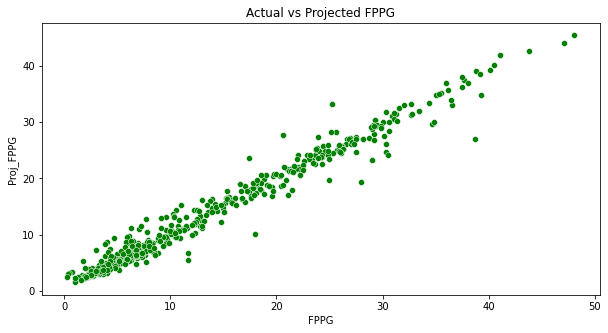

In [40]:
# plot prpjections against actuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=pitcher['FPPG'], y=pitcher['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

Really good model how does it do on truely unseen data.

In [28]:
# read in clean testing data
pitcher_21 = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [29]:
# drop columns so as to same shape as X
testing = pitcher_21.drop(columns=['Name','Team','Pos','FPPG', 'PTS'])

In [41]:
# create projections for testing (2021) data based on model fit with train (2019-2020)
pitcher_21['Proj_FPPG'] = forest.predict(testing)

In [42]:
# baseline mean of 2021 data
pitcher_21['FPPG'].mean()

12.726196279941412

In [43]:
# projected mean of 2021 data
pitcher_21['Proj_FPPG'].mean()

11.167426073237015

In [44]:
# RMSE
mean_squared_error(pitcher_21['FPPG'], pitcher_21['Proj_FPPG'], squared=False)

7.432602805199841

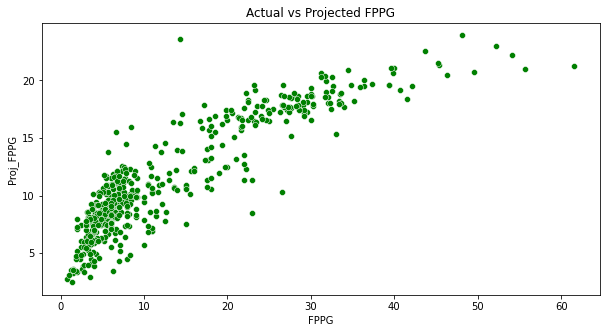

In [45]:
# plot prpjections against actuals testing data
plt.figure(figsize=(10,5))
sns.scatterplot(x=pitcher_21['FPPG'], y=pitcher_21['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

In [46]:
# check out outlier
pitcher_21.loc[pitcher_21['Proj_FPPG']<0]

,Name,Team,Pos,W,L,GMS,GS,SV,IP,H,R,ER,HR,BB,SO,PTS,ERA,WHIP,FPPG,Proj_FPPG


In [47]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [48]:
coef_df

,Feature,Coeficient
13,WHIP,-0.815633
12,ERA,-0.658650
2,GMS,-0.164820
7,R,-0.032246
6,H,-0.026846
9,HR,-0.023832
1,L,-0.020970
4,SV,0.016202
5,IP,0.039957
11,SO,0.056174


Based on these coefficients I think we may need to scale the data to get all features on the same scale.  Then pull coefficient value to determine importance.